<a href="https://colab.research.google.com/github/Asifr001/Machine_Learning_Heart_Failure_Prediction/blob/main/ML_Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

**Importing Dataset and Data Exploration**

In [6]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.shape

(299, 13)

**Note:** We have 299 Rows and 13 C0lumns

In [9]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
#See the whole dataset

pd.set_option('display.max_rows', 300)

data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.000,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.000,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.000,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.000,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,90.000,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,60.000,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,65.000,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,80.000,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


In [11]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In this project I will try to predict death event of the Heartfailure patient.

**To make it easier for analysis, I will split our dataset into two categories - Categorical and Continuous.**



In [12]:
categorical_variables = data[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_variables = data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine",\
                             "serum_sodium","time"]]

**As, I will try to predict death event of the Heartfailure patient, I did not add death event in above cell.**

**Notes for categorical data:**

Anaemia : 0 = the person does not have anaemia, 1 = it does.

Diabetes : 0 = the person does not have diabetes, 1= it does.

High_blood_pressure : 0 = the person does not have high_blood_pressure, 1 = it does.

Smoking : 0 = the person does not smoke, 1 = it smokes.

Sex : 0 for female, 1 for male.

DEATH_EVENT : 0 means heart failure is not the cause of the death, if 1 it is.

**Note: I have used the data from Kaggle, they ususally do not have missing value. But, to be sure I am checking the null value in below cell.**

In [13]:
data.isna().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [14]:
data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


So, there is no null or missing value in the dataset.

Now I will analyze the descriptive statistics of the continuous variables.

In [15]:
continuous_variables.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [16]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


**Note: It is clear that the dataset is unbalanced, because the total deaths(96) is less than half of the total persons that did not die because of heart failure (203).**

Btw, [ ] = means series and [ [ ] ] = data frame. To visualize it has to be data frame

In [17]:
age = data[["age"]]
platelets = data[["platelets"]]

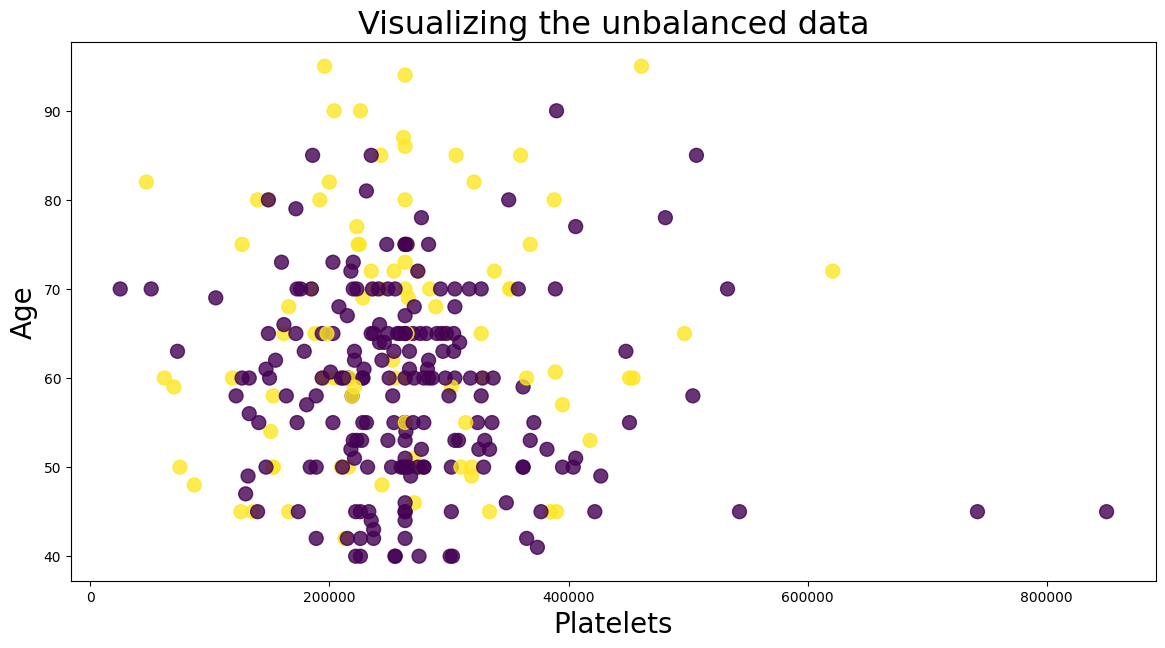

In [18]:
#Visualizing the unbalanced data with a scatter plot, the colors will depend on DEATH_EVENT (0 or 1)

plt.figure(figsize=(14,7))
plt.scatter(platelets, age, c = data["DEATH_EVENT"], s=100, alpha=0.8) #c = color, s = size and alpha = darkness - of the dot
plt.xlabel("Platelets", fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.title("Visualizing the unbalanced data", fontsize=23)
plt.show()

  **Note: There are more purple dots than in yellow. Purple = 0 , Yellow = 1**

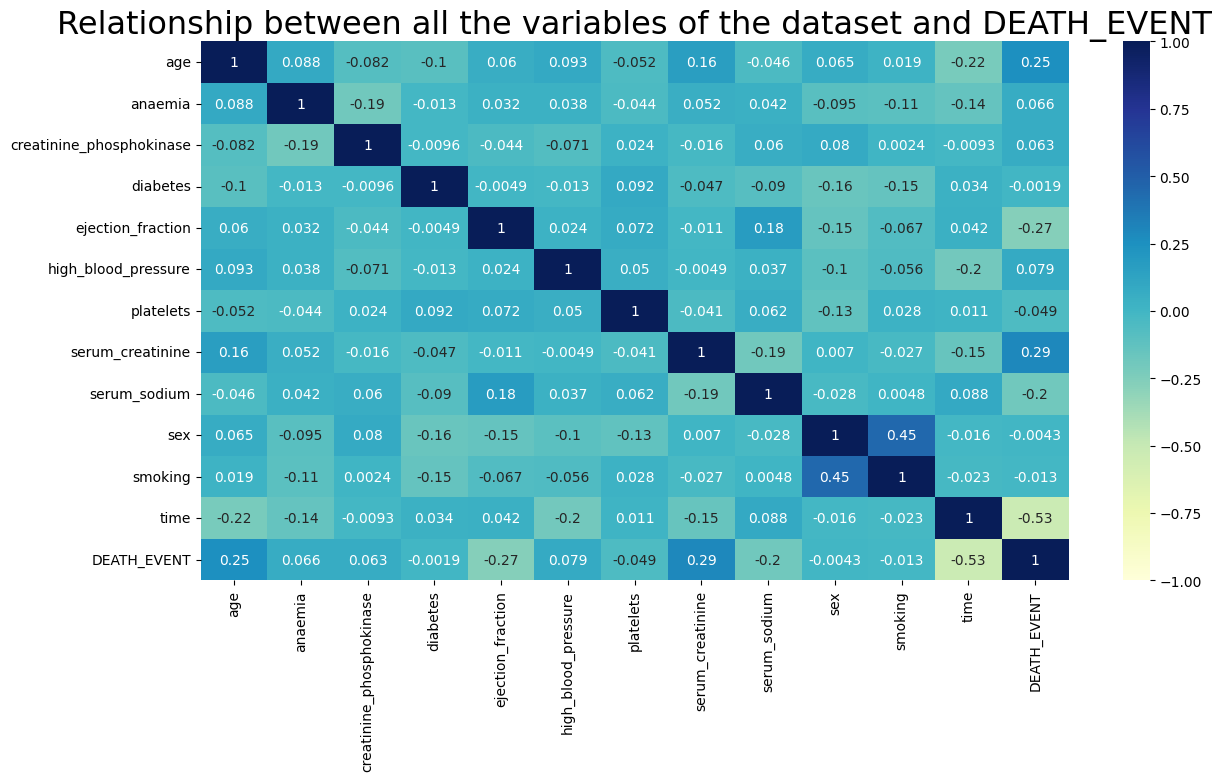

In [19]:
# Relationship between all the variables of the dataset and DEATH_EVENT
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.title("Relationship between all the variables of the dataset and DEATH_EVENT", fontsize = 23)
plt.show()

*Note:* *Here all the values are between -1 to +1*. *If they are closer to +1, that means they are correleted and positively correleted*.

*And they closer to -1, that means they are correleted and negatively correleted*.

*and 0 means no correlation.*

**Now, There is a positive correlation between DEATH_EVENT and serum creatinine and age. And also a negative correlation between DEATH_EVENT and time, ejection fraction and serum sodium a little bit.**

--------------------------------------

**Data Visualization**

In [20]:
categorical_data = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
continuous_data = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

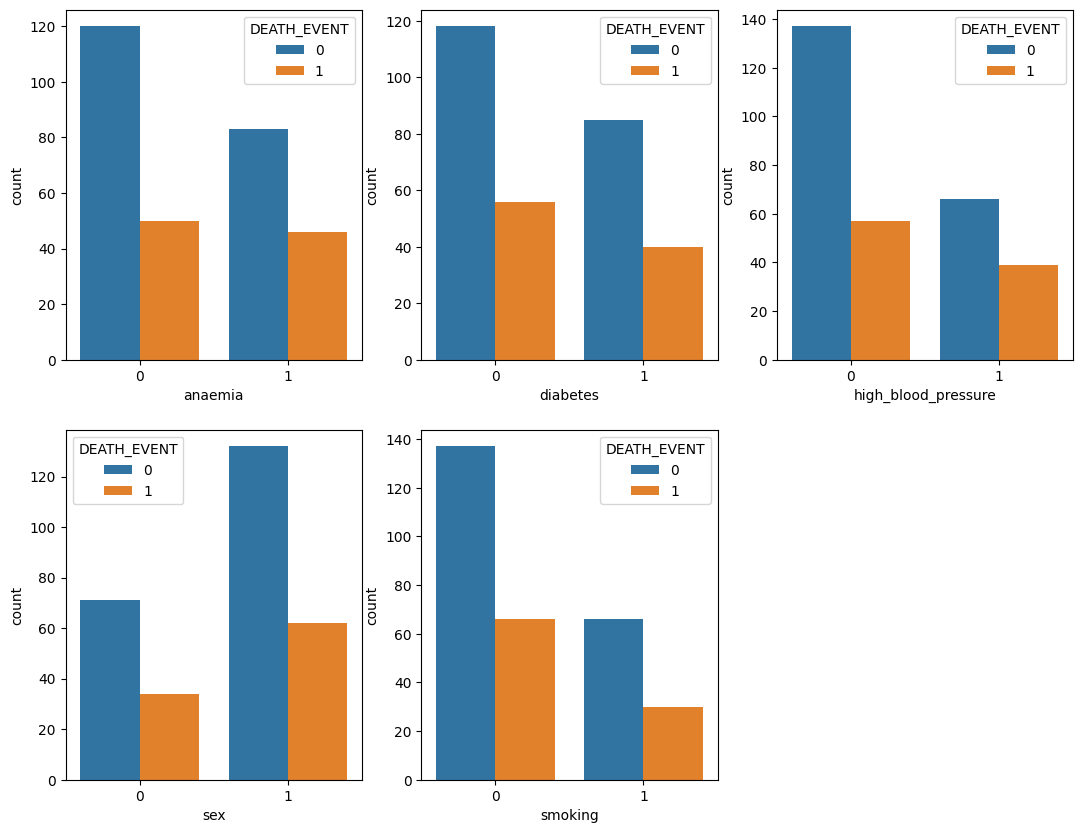

In [21]:
# Plotting the impact of categorical variables on DEATH_EVENT. Here for loop was used to generate graphs for 5 categorical variables.

plt.figure(figsize=(13,10))
for i,cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1) # code explained below
    sns.countplot(data = data, x= cat, hue = "DEATH_EVENT")
plt.show()

<Axes: xlabel='diabetes', ylabel='count'>

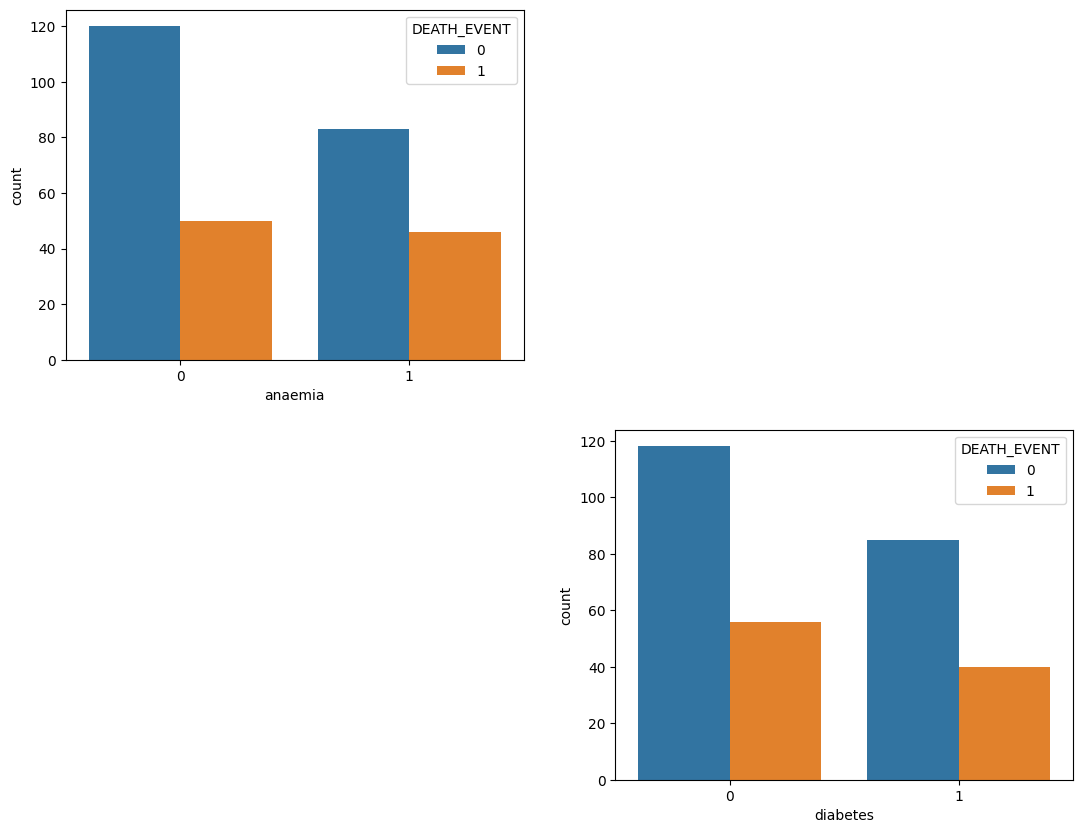

In [23]:
# plt.subplot(2,3,i+1) means that in the output image there will be 2 rows and in each row there will be 3 figures. i+1 means where the figure will be placed. This code helps not to write the same code for 5 times.

# For example:

# In this code, they will show below output.

plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.countplot(data = data, x= 'anaemia', hue = "DEATH_EVENT")
plt.subplot(2,2,4)
sns.countplot(data = data, x= 'diabetes', hue = "DEATH_EVENT")

In [25]:
# For Example 2:

#For i+1 code:
for i,cat in enumerate(categorical_data):
    print(i, cat)


0 anaemia
1 diabetes
2 high_blood_pressure
3 sex
4 smoking


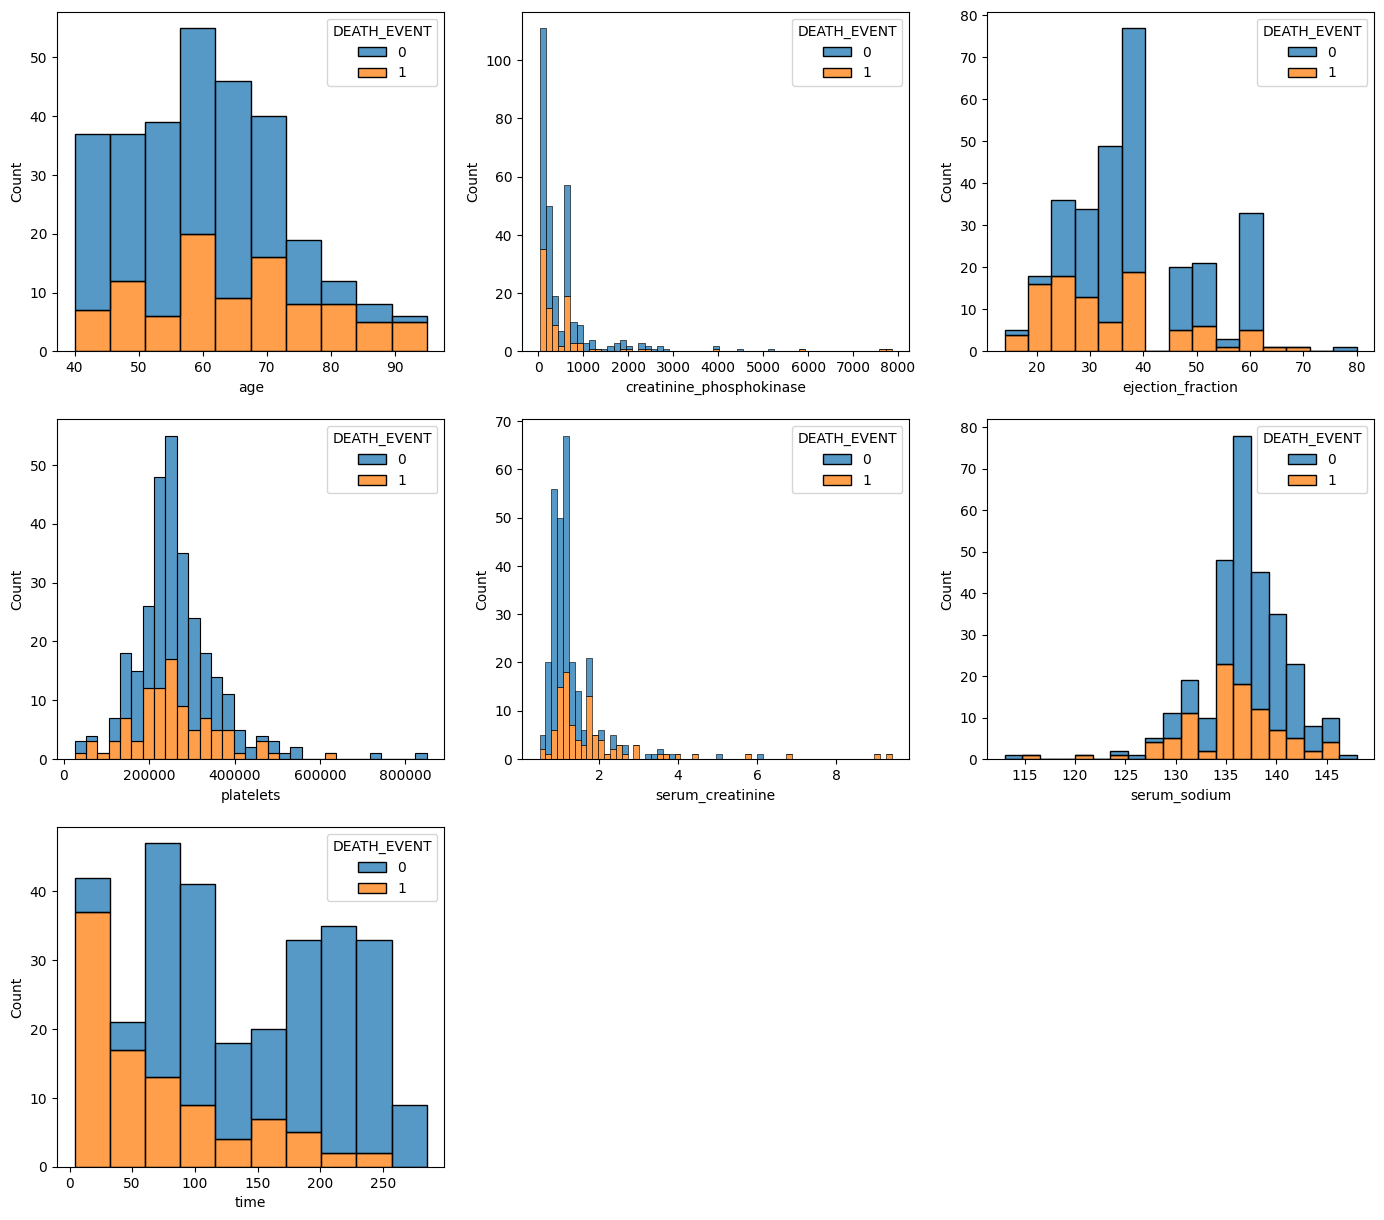

In [26]:
# Plotting the impact of continuous variables on DEATH_EVENT using histogram.

plt.figure(figsize=(17,15))
for j,con in enumerate(continuous_data):
    plt.subplot(3,3,j+1)
    sns.histplot(data = data, x= con, hue = "DEATH_EVENT", multiple="stack")
plt.show()

0 age
1 creatinine_phosphokinase
2 ejection_fraction
3 platelets
4 serum_creatinine
5 serum_sodium
6 time


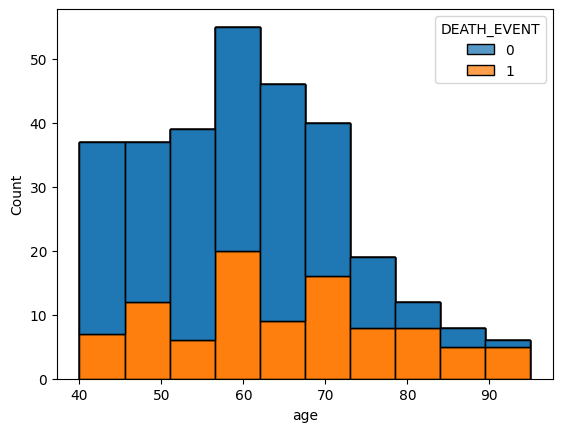

In [29]:
# Code explanation:

for i,cat in enumerate(continuous_data):
    print(i, cat)

    sns.histplot(data = data, x= 'age', hue = "DEATH_EVENT", multiple="stack")

    # multiple = stack means it will not overlap.

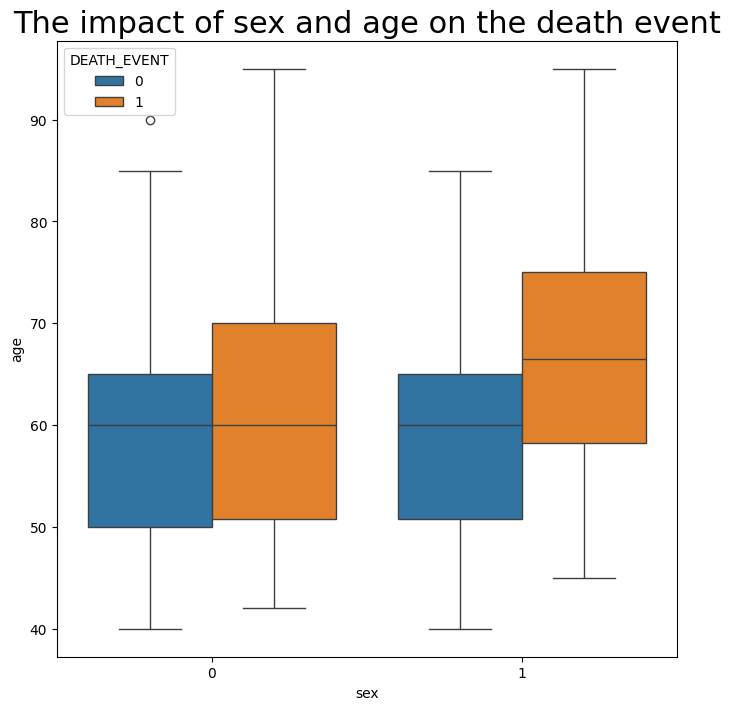

In [30]:
#Using boxplot t0 get insight.

plt.figure(figsize=(8,8))
sns.boxplot(data=data, x="sex", y="age", hue="DEATH_EVENT")
plt.title("The impact of sex and age on the death event", fontsize=22)
plt.show()

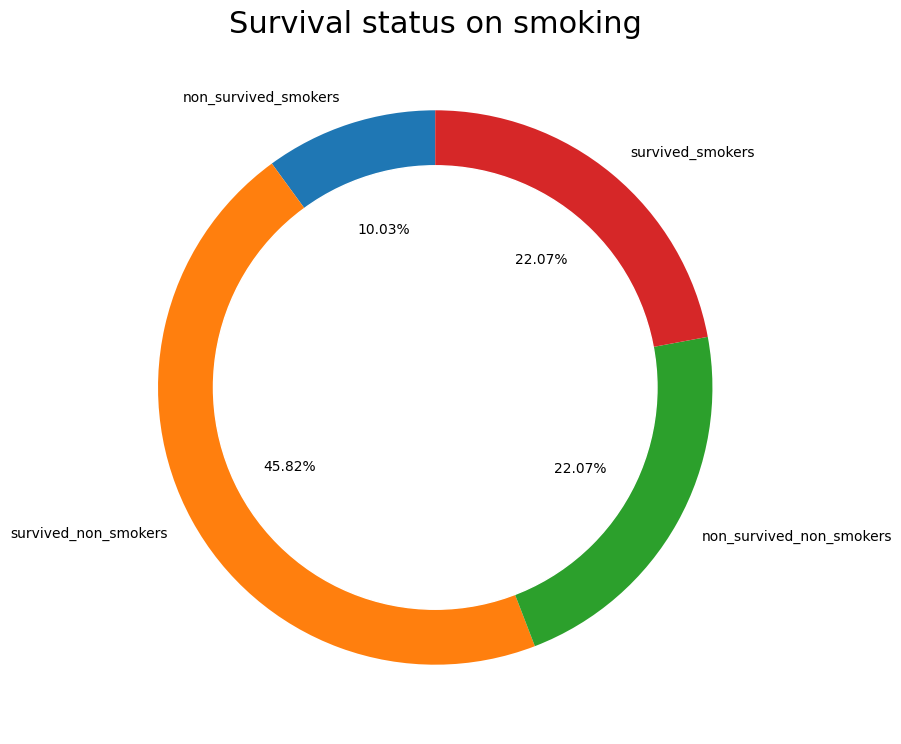

In [31]:
# Analyzing the survival status on smoking

smokers = data[data["smoking"]==1]
non_smokers = data[data["smoking"]==0]

non_survived_smokers = smokers[smokers["DEATH_EVENT"]==1]
survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==0]
non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==1]
survived_smokers = smokers[smokers["DEATH_EVENT"]==0]

smoking_data = [len(non_survived_smokers), len(survived_non_smokers),len(non_survived_non_smokers),len(survived_smokers)]
smoking_labels = ["non_survived_smokers", "survived_non_smokers", "non_survived_non_smokers", "survived_smokers"]

plt.figure(figsize=(9,9))
plt.pie(smoking_data, labels = smoking_labels, autopct='%.2f%%', startangle=90)
circle = plt.Circle((0,0), 0.8, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on smoking", fontsize=22)
plt.show()

In [32]:
# Selecting only smokers who are dead

smokers[smokers["DEATH_EVENT"]==1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.00,131,1,1,10,1
11,62.0,0,231,0,25,1,253000.00,0.90,140,1,1,10,1
22,68.0,1,220,0,35,1,289000.00,0.90,140,1,1,20,1
25,80.0,0,148,1,38,0,149000.00,1.90,144,1,1,23,1
27,70.0,0,122,1,45,1,284000.00,1.30,136,1,1,26,1
29,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26,1


([<matplotlib.patches.Wedge at 0x795dfcc27ad0>,
 [Text(-0.3410177745934297, 1.045804416423714, 'non_survived_smokers'),
  Text(-0.9658243170347182, -0.5264820876577098, 'survived_non_smokers'),
  Text(0.9602393154328239, -0.5366008359079417, 'non_survived_non_smokers'),
  Text(0.7031233830425759, 0.8459417877246419, 'survived_smokers')],
 [Text(-0.1860096952327798, 0.570438772594753, '10.0%'),
  Text(-0.5268132638371189, -0.2871720478132962, '45.8%'),
  Text(0.5237668993269948, -0.2926913650406955, '22.1%'),
  Text(0.3835218452959505, 0.4614227933043501, '22.1%')])

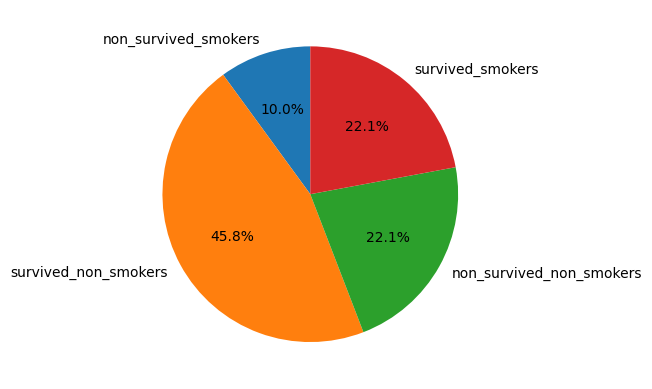

In [33]:
#Pie chart

plt.pie(smoking_data, labels = smoking_labels, autopct='%.1f%%', startangle=90)

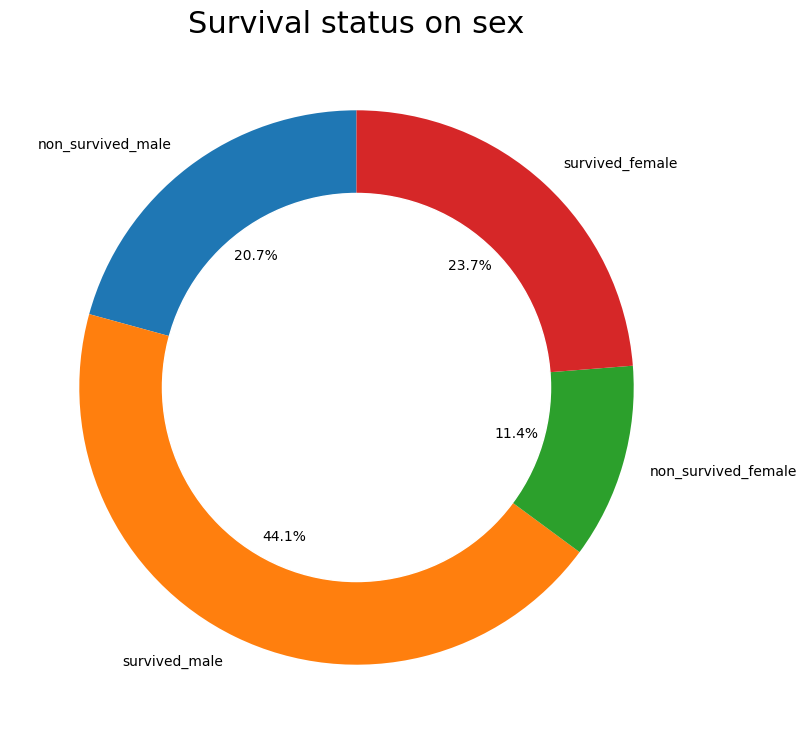

In [34]:
# Analyzing the survival status on sex

male = data[data["sex"]==1]
female = data[data["sex"]==0]

non_survived_male = male[male["DEATH_EVENT"]==1]
survived_male = male[male["DEATH_EVENT"]==0]
non_survived_female = female[female["DEATH_EVENT"]==1]
survived_female = female[female["DEATH_EVENT"]==0]

sex_data = [len(non_survived_male), len(survived_male), len(non_survived_female),len(survived_female)]
sex_labels = ["non_survived_male","survived_male","non_survived_female","survived_female"]

plt.figure(figsize=(9,9))
plt.pie(sex_data, labels = sex_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on sex", fontsize=22)
plt.show()

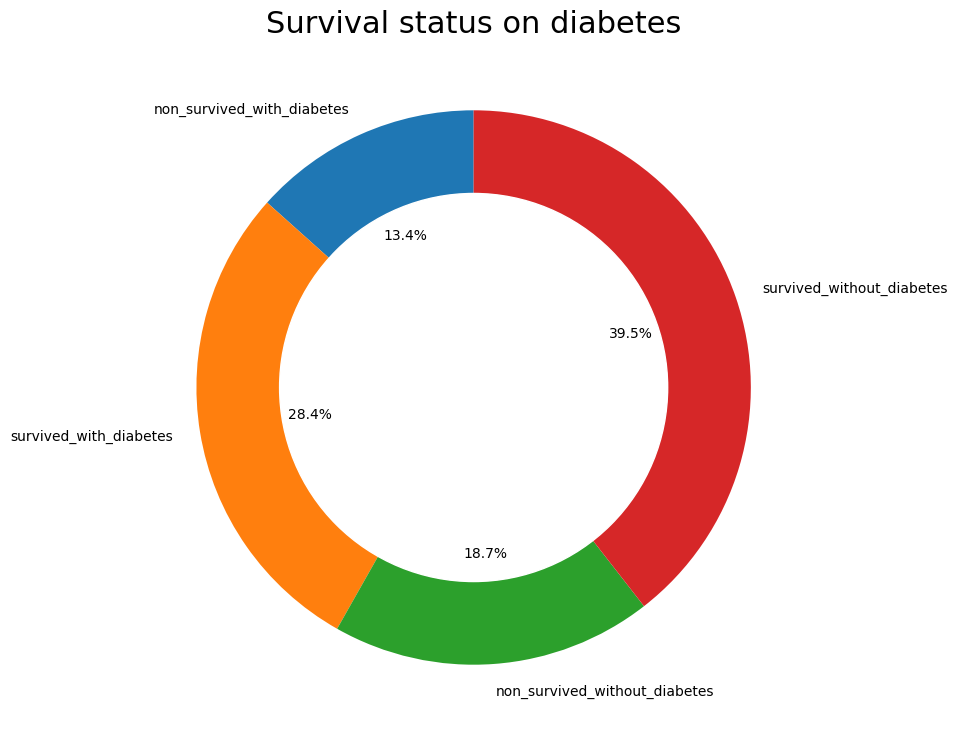

In [35]:
# Analyzing the survival status on diabetes

with_diabetes = data[data["diabetes"]==1]
without_diabetes = data[data["diabetes"]==0]

non_survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==1]
survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==0]
non_survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==1]
survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==0]

diabetes_data = [len(non_survived_with_diabetes), len(survived_with_diabetes), len(non_survived_without_diabetes), \
                 len(survived_without_diabetes)]
diabetes_labels = ["non_survived_with_diabetes","survived_with_diabetes","non_survived_without_diabetes",\
                   "survived_without_diabetes"]

plt.figure(figsize=(9,9))
plt.pie(diabetes_data, labels = diabetes_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on diabetes", fontsize=22)
plt.show()

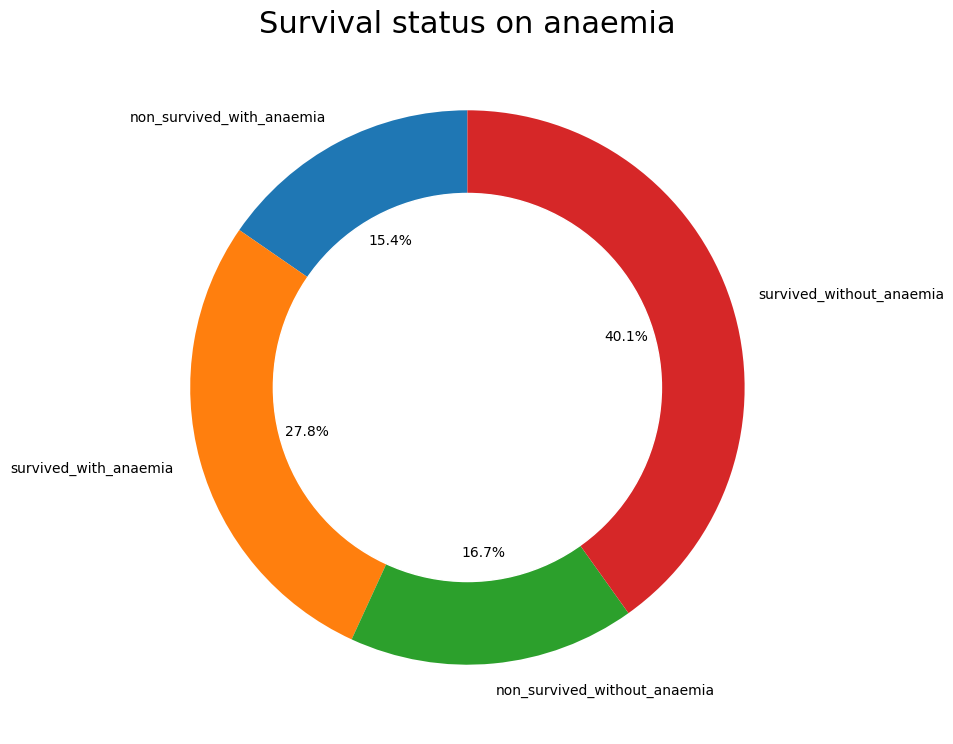

In [36]:
# Analyzing the survival status on anaemia

with_anaemia = data[data["anaemia"]==1]
without_anaemia = data[data["anaemia"]==0]

non_survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==1]
survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==0]
non_survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==1]
survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==0]

anaemia_data = [len(non_survived_with_anaemia), len(survived_with_anaemia), len(non_survived_without_anaemia), \
                len(survived_without_anaemia)]
anaemia_labels = ["non_survived_with_anaemia","survived_with_anaemia","non_survived_without_anaemia",\
                  "survived_without_anaemia"]

plt.figure(figsize=(9,9))
plt.pie(anaemia_data, labels = anaemia_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on anaemia", fontsize=22)
plt.show()

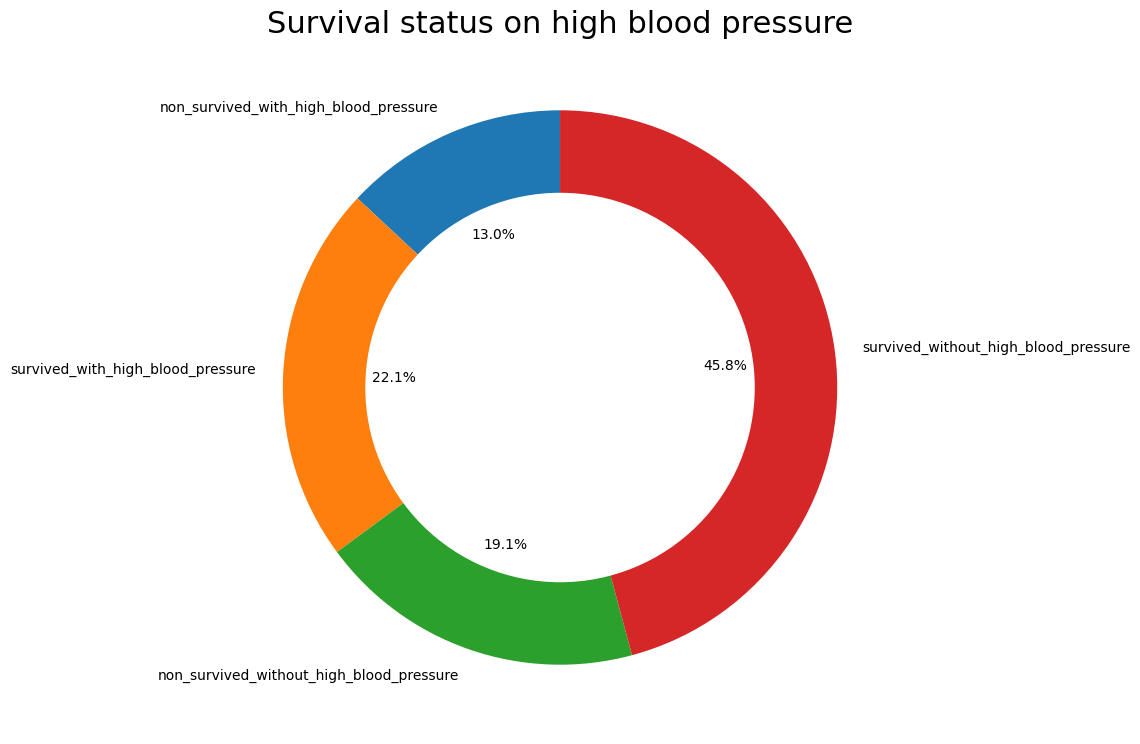

In [37]:
# Analyzing the survival status on high blood pressure

with_high_blood_pressure = data[data["high_blood_pressure"]==1]
without_high_blood_pressure = data[data["high_blood_pressure"]==0]

non_survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==1]
survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==0]
non_survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==1]
survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==0]

high_blood_pressure_data = [len(non_survived_with_high_blood_pressure), len(survived_with_high_blood_pressure), \
                            len(non_survived_without_high_blood_pressure), len(survived_without_high_blood_pressure)]

high_blood_pressure_labels = ["non_survived_with_high_blood_pressure","survived_with_high_blood_pressure",\
                   "non_survived_without_high_blood_pressure","survived_without_high_blood_pressure"]

plt.figure(figsize=(9,9))
plt.pie(high_blood_pressure_data, labels = high_blood_pressure_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on high blood pressure", fontsize=22)
plt.show()

------------------------------

**Data Modeling and Machine Learning Based Prediction Using Continuous Data**

In [38]:
x = data[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time"]]
y = data["DEATH_EVENT"]

In [39]:
#We will have 30% for testing and 70% for training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [40]:
# Data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [41]:
 # A list to save all the values from different models accuracy for comparaison using a bar chart
 accuracy_list = []

**First, Logistic Regression**

In [42]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_prediction = lr_model.predict(x_test_scaled)
lr_accuracy = (round(accuracy_score(lr_prediction, y_test), 4) * 100) #For percentage
accuracy_list.append(lr_accuracy)

**Second, Support Vector Machine (SVM)**

In [43]:
svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)
svc_prediction = svc_model.predict(x_test_scaled)
svc_accuracy = (round(accuracy_score(svc_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(svc_accuracy)

**Third, KNearestNeighbor (KNN)**

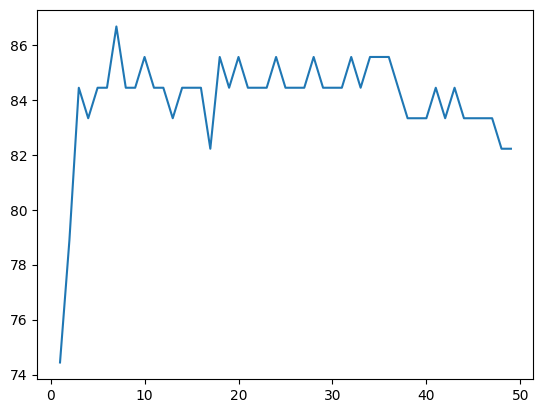

In [44]:
# Use this program to find the optimal value of k
knn_list = []
for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train_scaled, y_train)
    knn_prediction = knn_model.predict(x_test_scaled)
    knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100)
    knn_list.append(knn_accuracy)
k = np.arange(1,50)
plt.plot(k, knn_list)

In [45]:
#From the previous diagram, the highest value of K is 6.

knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train_scaled, y_train)
knn_prediction = knn_model.predict(x_test_scaled)
knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(knn_accuracy)

**Fourth, Decision Tree**

In [46]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict(x_test_scaled)
dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(dt_accuracy)

**Fifth, Naive Bayes**

In [47]:
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
nb_prediction = nb_model.predict(x_test_scaled)
nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(nb_accuracy)

**Last one, Random Forest**

In [48]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_model.predict(x_test_scaled)
rf_accuracy = (round(accuracy_score(rf_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(rf_accuracy)

In [49]:
#Show the accuracy of the 6 models

accuracy_list

[87.78, 84.44, 84.44, 88.89, 82.22, 86.67]

In [50]:
models = ["Logistic Regression","SVC","KNN","Decision Tree","Naive Bayes","Random Forest"]

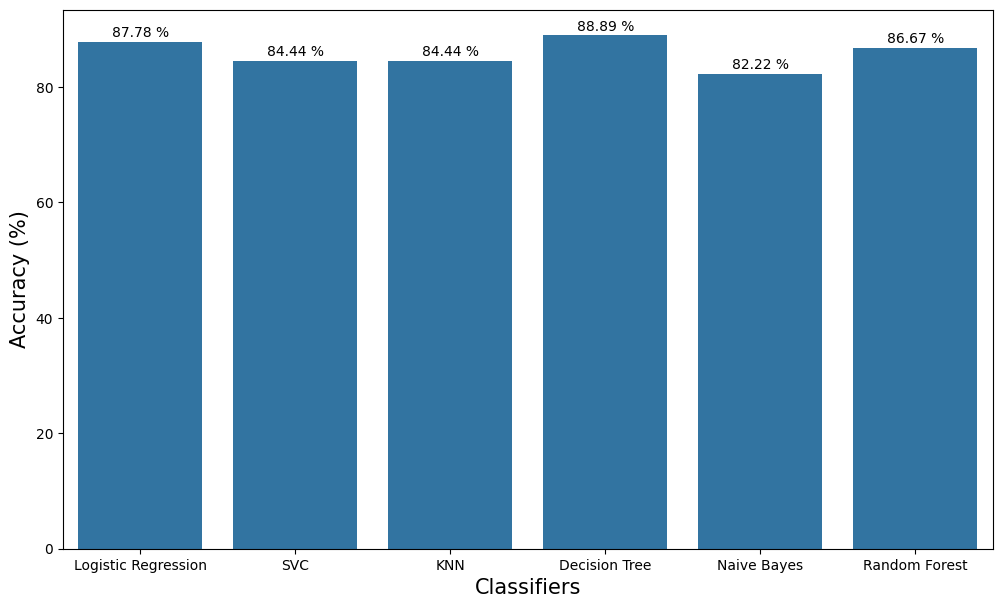

In [51]:
# Displaying the accuracy using bar plot to compare

plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y+ height*1.01), ha="center")
plt.show()

<ipython-input-52-0b29b2bbc30b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracy_list, palette="tab10")  # Use a color palette


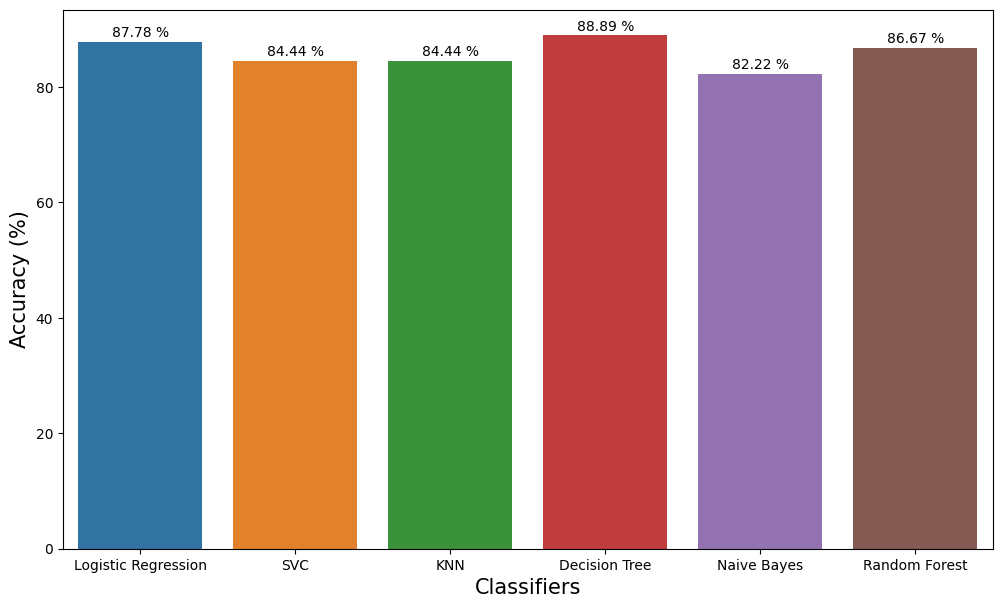

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying the accuracy using a bar plot with unique colors
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list, palette="tab10")  # Use a color palette
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)

# Add annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")

plt.show()